In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ase.io.espresso
from ase.dft.bee import ensemble

In [2]:
H_ensemble_pwo = '/work/westgroup/harris.se/espresso/qe_workflow/results/adsorbate/H/ensemble_60/espresso.pwo'

In [3]:
with open(H_ensemble_pwo, 'r') as f:
    H = list(ase.io.espresso.read_espresso_out(f, index=slice(None)))

In [4]:
H[0].calc.results

{'energy': -13.536405626899247,
 'free_energy': -13.536405626899247,
 'forces': array([[0., 0., 0.]]),
 'stress': array([ 2.75447285e-06,  2.75447285e-06,  2.75447285e-06, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00])}

In [9]:
with open(H_ensemble_pwo, 'r') as f:
    xc_start = 'BEEF-vdW xc energy contributions'
    xc_contribs = []
    with open(H_ensemble_pwo, 'r') as f:
        xc_section = False
        for line in f:
            if xc_section:
                if line.strip() == '':
                    break
                xc_contribs.append(float(line.split()[2]))
            if xc_start in line:
                xc_section = True
    xc_contribs = np.array(xc_contribs)

In [11]:
ase_energies = ensemble(H[0].calc.results['energy'], xc_contribs, 'BEEF-vdW')

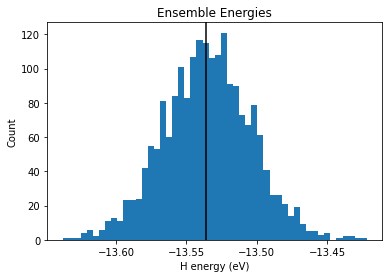

In [19]:
# Plot a histogram
results = plt.hist(ase_energies, bins=50)
plt.title('Ensemble Energies')
plt.xlabel('H energy (eV)')
plt.ylabel('Count')
plt.axvline(H[0].calc.results['energy'], color='black')

In [26]:
np.mean(ase_energies)

-13.535180412729764

In [27]:
np.std(ase_energies)

0.031026516103812737

In [ ]:
# Read in the 2000 entries

In [21]:
BEEF_start = 'BEEFens 2000 ensemble energies'
energies = []
with open(H_ensemble_pwo, 'r') as f:
    ensemble_section = False
    for line in f:
        if ensemble_section:
            if line.strip() == '':
                break
            energies.append(float(line))
        if BEEF_start in line:
            ensemble_section = True
energies = np.array(energies) # * 13.60569301  # convert Rydberg to eV... interesting, you get similar results if you assume the energies are in eV
# print(xc_energies[-10:])

In [22]:
# !    total energy              =      -0.99490755 Ry
#      estimated scf accuracy    <       0.00000021 Ry
#      smearing contrib. (-TS)   =      -0.03281829 Ry
#      internal energy E=F+TS    =      -0.96208926 Ry

#      The total energy is F=E-TS. E is the sum of the following terms:
#      one-electron contribution =      -0.84511331 Ry
#      hartree contribution      =       0.51510551 Ry
#      xc contribution           =      -0.55700981 Ry
#      ewald contribution        =      -0.07507166 Ry

In [24]:
# energies_Ry = one_electron_contribution + hartree_contribution + ewald_contribution + xc_energies
# energies = energies_Ry * 13.60569301  # convert Rydberg to eV
# print(energies_Ry[0:19])
energies += H[0].calc.results['energy']

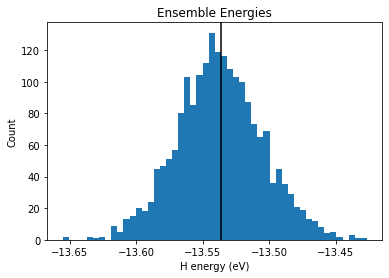

In [25]:
# Plot a histogram
results = plt.hist(energies, bins=50)
plt.title('Ensemble Energies')
plt.xlabel('H energy (eV)')
plt.ylabel('Count')
plt.axvline(H[0].calc.results['energy'], color='black')

In [28]:
np.mean(energies)

-13.537324035632704

In [30]:
np.std(energies)

0.03196751295598592